In [127]:
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image
import struct
from sys import getsizeof
from numpy.linalg import svd
import seaborn as sns

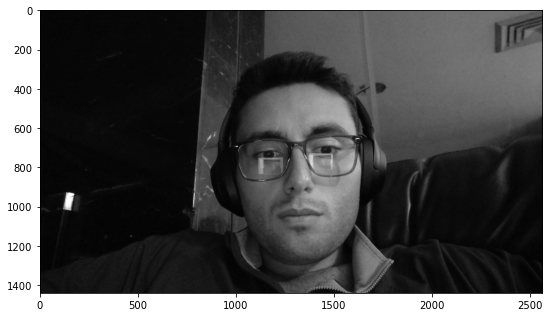

In [12]:
img = Image.open(r'C:\Users\Brian\Documents\Scientific Computing\WIN_20210401_19_58_14_Pro.jpg')
imgconv = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imgconv)

In [18]:
print(imgconv)

<PIL.Image.Image image mode=LA size=2560x1440 at 0x19C990D14C0>


In [3]:
type(imgconv)

PIL.Image.Image

[[ 8.  8.  8. ... 91. 91. 90.]
 [ 8.  8.  8. ... 91. 91. 90.]
 [ 8.  8.  8. ... 91. 91. 91.]
 ...
 [16. 16. 16. ...  4.  5.  5.]
 [15. 14. 14. ...  5.  5.  5.]
 [15. 15. 15. ...  6.  6.  6.]]
255.0
Storage memory= 3686400


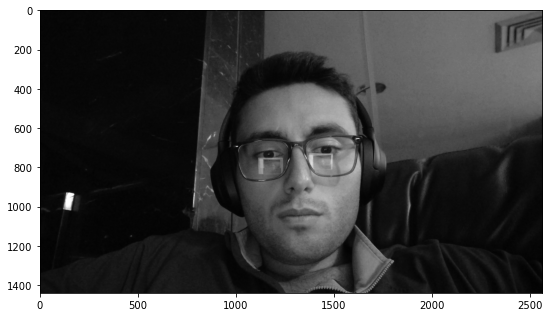

In [4]:
imgmat = np.array(list(imgconv.getdata(band=0)), float)
imgmat.shape = (imgconv.size[1], imgconv.size[0])
imgmat = np.matrix(imgmat)
print(imgmat)
print(np.amax(imgmat)) 
original_st=imgmat.shape[0]*imgmat.shape[1] 
print('Storage memory=',original_st)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap= 'gray')

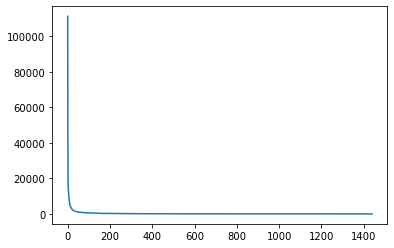

In [82]:
U, sigma, V = np.linalg.svd(imgmat)
#print(sigma)
plt.plot(sigma)

Percent of storage memory= 0.002170138888888889
<function shape at 0x0000019C89B350D0>


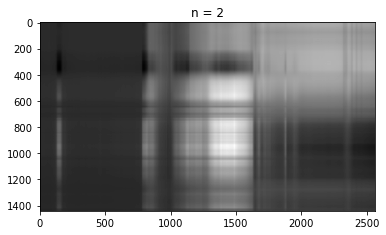

Percent of storage memory= 0.007595486111111111
<function shape at 0x0000019C89B350D0>


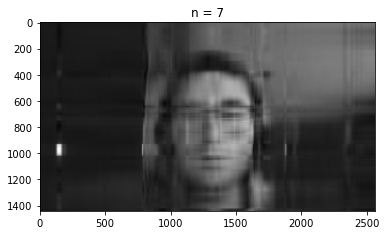

Percent of storage memory= 0.013020833333333334
<function shape at 0x0000019C89B350D0>


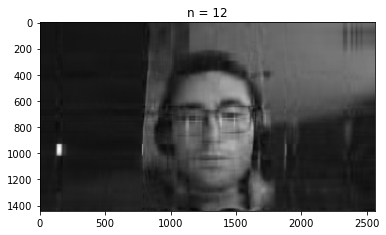

Percent of storage memory= 0.018446180555555556
<function shape at 0x0000019C89B350D0>


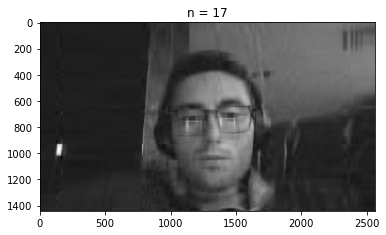

Percent of storage memory= 0.023871527777777776
<function shape at 0x0000019C89B350D0>


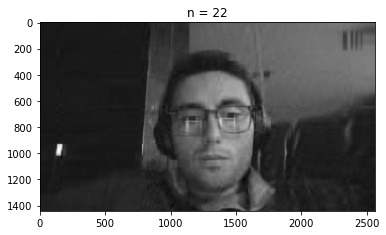

Percent of storage memory= 0.029296875
<function shape at 0x0000019C89B350D0>


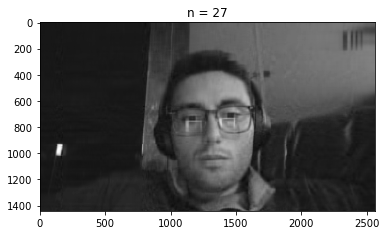

Percent of storage memory= 0.034722222222222224
<function shape at 0x0000019C89B350D0>


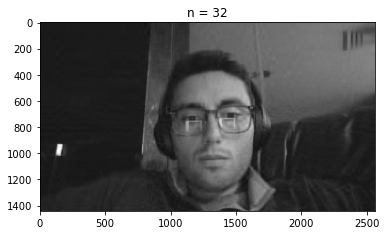

Percent of storage memory= 0.04014756944444445
<function shape at 0x0000019C89B350D0>


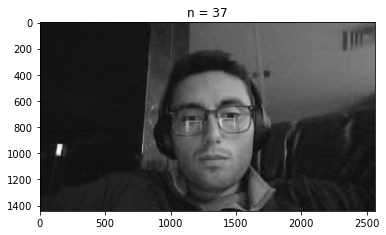

Percent of storage memory= 0.045572916666666664
<function shape at 0x0000019C89B350D0>


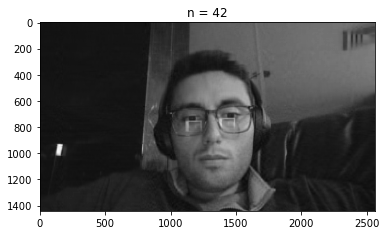

Percent of storage memory= 0.05099826388888889
<function shape at 0x0000019C89B350D0>


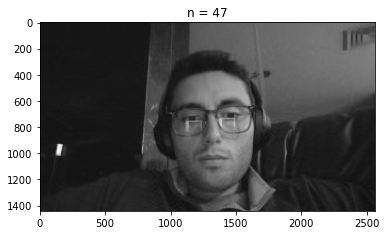

In [7]:
for i in range(2,50,5):
    reconstimg = i+np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    reconstimg_st=np.shape(U[:, :i])[0]*np.shape(U[:, :i])[1]+np.shape(V[:i, :])[0]*np.shape(V[:i, :])[1]
    print('Percent of storage memory=',reconstimg_st/original_st)
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    print(np.shape)
    plt.title(title)
    plt.show()

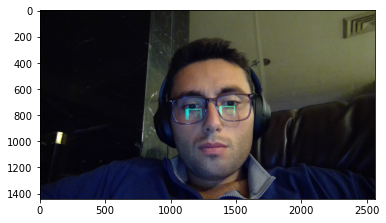

Red Storage memory= 3686400
Green Storage memory= 3686400
Green Storage memory= 3686400
Original Storage memory= 11059200


In [60]:
image = Image.open(r'C:\Users\Brian\Documents\Scientific Computing\WIN_20210401_19_58_14_Pro.jpg')
image = np.asarray(image)
plt.imshow(image)
plt.show()

red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]

red_original_st = red.shape[0]*red.shape[1]
print('Red Storage memory=',red_original_st)

green_original_st = green.shape[0]* green.shape[1]
print('Green Storage memory=', green_original_st)

blue_original_st = blue.shape[0]* blue.shape[1]
print('Green Storage memory=', blue_original_st)

color_original_st = red_original_st + green_original_st + blue_original_st
print('Original Storage memory=', color_original_st)

In [113]:
def compress(img, i):
    # Create 3 arrays, one for red, one for green and for blue
    red = img[:, :, 0]
    green = img[:, :, 1]
    blue = img[:, :, 2]
    
    # Apply SVD to 3 new matrices
    URed, sigmaRed, VRed = np.linalg.svd(red)
    UGreen, sigmaGreen, VGreen = np.linalg.svd(green)
    UBlue, sigmaBlue, VBlue = np.linalg.svd(blue)
    
   
    # Apply same process as black and white image compression
    # Except this time apply the process for each of the 3 colors
    Red_reconstimg = np.matrix(URed[:, :i]) * np.diag(sigmaRed[:i]) * np.matrix(VRed[:i, :])
    Red_reconstimg_st=np.shape(URed[:, :i])[0]*np.shape(URed[:, :i])[1]+np.shape(VRed[:i, :])[0]*np.shape(VRed[:i, :])[1]
    plt.imshow(Red_reconstimg, cmap= 'gray')
    title = "Red n = %s" % i
    plt.title(title)
    plt.show()
        
    Green_reconstimg = np.matrix(UGreen[:, :i]) * np.diag(sigmaGreen[:i]) * np.matrix(VGreen[:i, :])
    Green_reconstimg_st=np.shape(UGreen[:, :i])[0]*np.shape(UGreen[:, :i])[1]+np.shape(VGreen[:i, :])[0]*np.shape(VGreen[:i, :])[1]
    plt.imshow(Green_reconstimg, 'gray')
    title = "Green n = %s" % i
    plt.title(title)
    plt.show()
        
    Blue_reconstimg = np.matrix(UBlue[:, :i]) * np.diag(sigmaBlue[:i]) * np.matrix(VBlue[:i, :])
    Blue_reconstimg_st=np.shape(UBlue[:, :i])[0]*np.shape(UBlue[:, :i])[1]+np.shape(VBlue[:i, :])[0]*np.shape(VBlue[:i, :])[1]
    plt.imshow(Blue_reconstimg, cmap= 'gray')
    title = "Blue n = %s" % i
    plt.title(title)
    plt.show()

    # Create new array of zeroes in the size of the original image
    m = np.zeros(img.shape)
    
    # Recompile the compressed images of 3 colors into matrix m defined above
    m[:, :, 0] = Red_reconstimg
    m[:, :, 1] = Green_reconstimg
    m[:, :, 2] = Blue_reconstimg
    
    
    # np.unit8 is a datatype with range [0,255]
    # Algorithm to change any negative values into positive, and any values greater than 255 into 255
    for i1, row in enumerate(m):
        for i2, col in enumerate(row):
            for i3, x in enumerate(col):
                if x > 255:
                    m[i1,i2,i3] = 255
                if x < 0:
                    m[i1,i2,i3] = abs(x)
                
    
    compressed = m.astype(np.uint8)
    error = (np.linalg.norm(img - m))/(np.linalg.norm(img))
    percentmemory = ((Red_reconstimg_st + Green_reconstimg_st + Blue_reconstimg_st)/ (color_original_st)) * 100
    
    plt.imshow(compressed)
    title = "Recompiled Image n = %s" % i
    plt.title(title)
    plt.show()
    print('Recompiled image percent of storage memory= ' + str(percentmemory) + ' %')
    print('The error is ' + str(error))
    
    return percentmemory, error

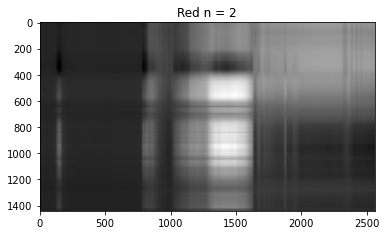

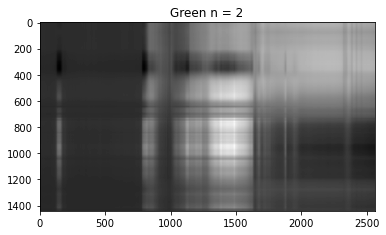

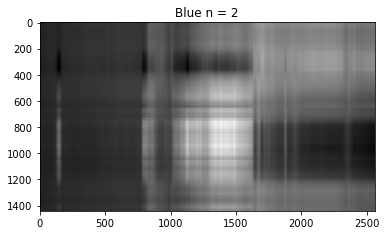

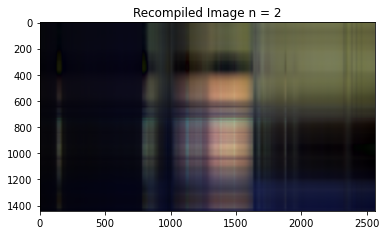

Recompiled image percent of storage memory= 0.2170138888888889 %
The error is 0.30179400417945434


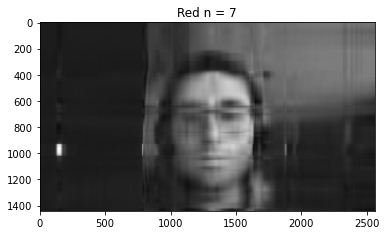

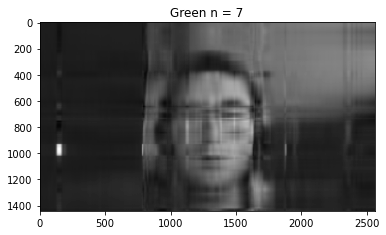

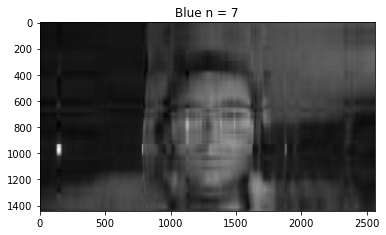

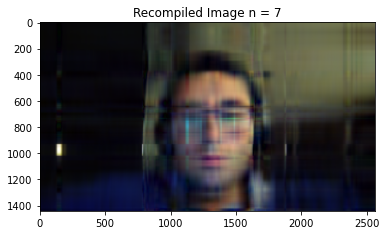

Recompiled image percent of storage memory= 0.759548611111111 %
The error is 0.17174506360166888


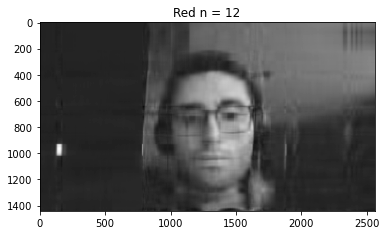

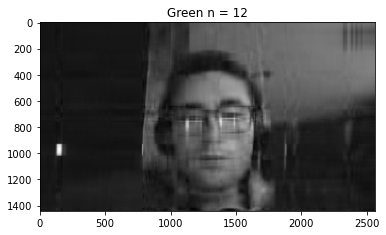

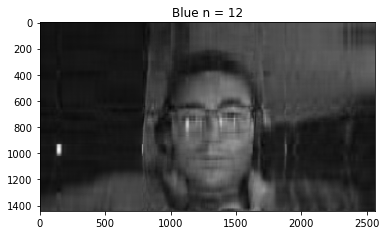

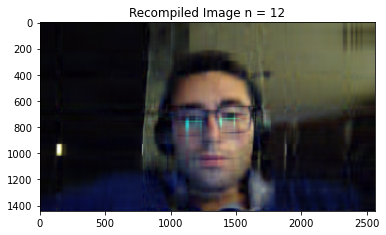

Recompiled image percent of storage memory= 1.3020833333333335 %
The error is 0.12919700802255085


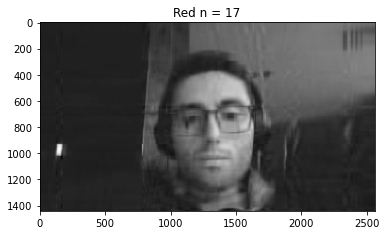

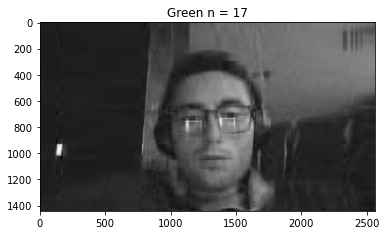

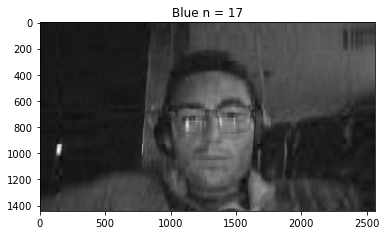

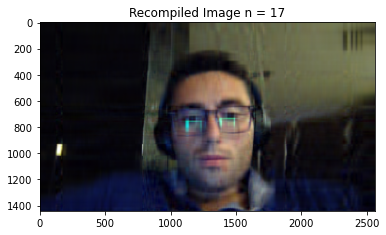

Recompiled image percent of storage memory= 1.8446180555555556 %
The error is 0.10616114669485748


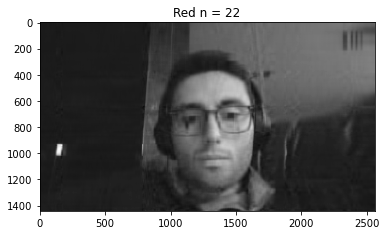

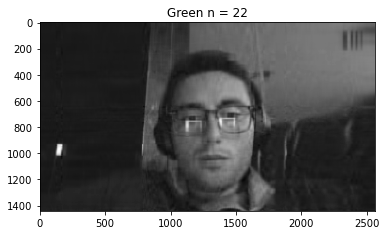

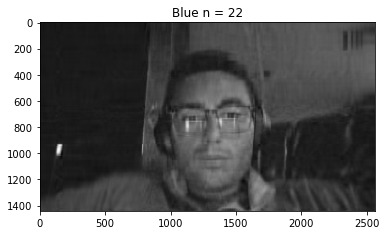

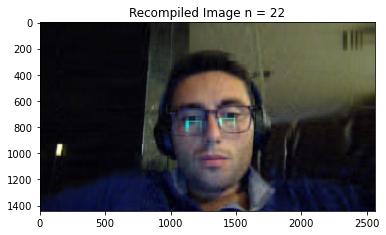

Recompiled image percent of storage memory= 2.3871527777777777 %
The error is 0.09182524704016043


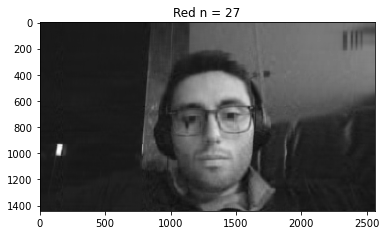

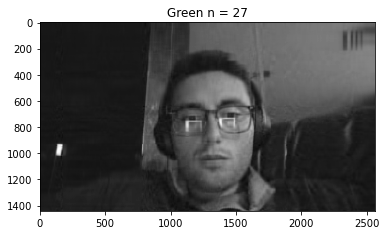

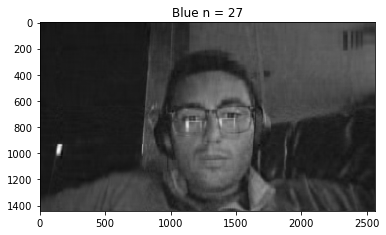

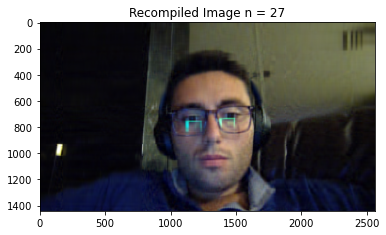

Recompiled image percent of storage memory= 2.9296875 %
The error is 0.08196107086802126


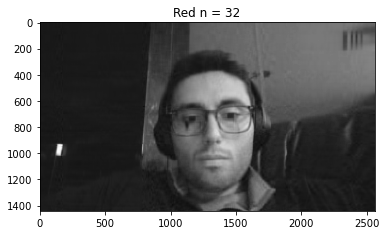

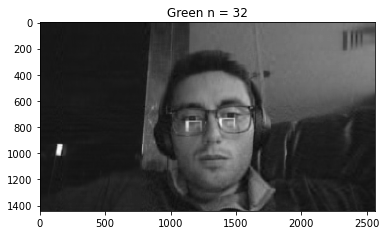

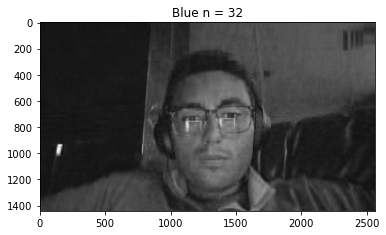

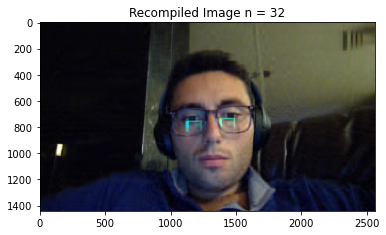

Recompiled image percent of storage memory= 3.4722222222222223 %
The error is 0.07500735004116764


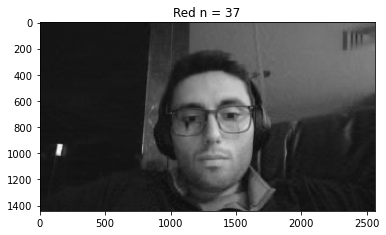

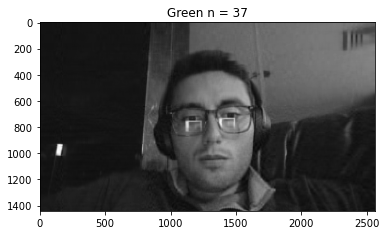

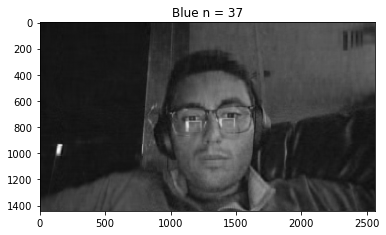

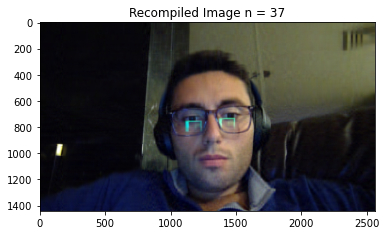

Recompiled image percent of storage memory= 4.014756944444445 %
The error is 0.06939482540346444


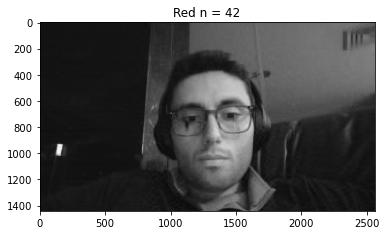

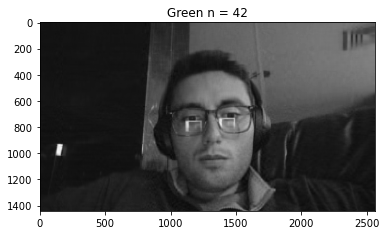

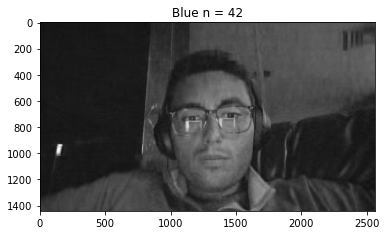

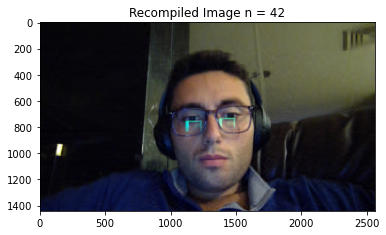

Recompiled image percent of storage memory= 4.557291666666666 %
The error is 0.06472537949070026


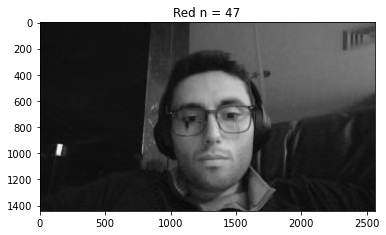

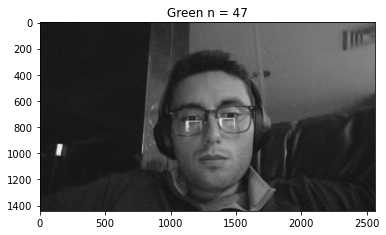

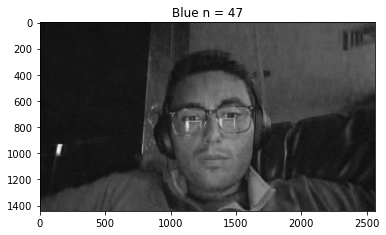

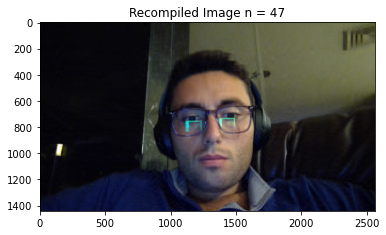

Recompiled image percent of storage memory= 5.099826388888888 %
The error is 0.060802337222840314


In [122]:
percentlist = []
errorlist = []
plist = []

for i in range (2, 50, 5):
    plist.append(i)
    a = compress(image, i)
    percentlist.append(a[0])
    errorlist.append(a[1])


In [123]:
percentlist

[0.2170138888888889,
 0.759548611111111,
 1.3020833333333335,
 1.8446180555555556,
 2.3871527777777777,
 2.9296875,
 3.4722222222222223,
 4.014756944444445,
 4.557291666666666,
 5.099826388888888]

In [124]:
plist

[2, 7, 12, 17, 22, 27, 32, 37, 42, 47]

In [125]:
errorlist

[0.30179400417945434,
 0.17174506360166888,
 0.12919700802255085,
 0.10616114669485748,
 0.09182524704016043,
 0.08196107086802126,
 0.07500735004116764,
 0.06939482540346444,
 0.06472537949070026,
 0.060802337222840314]

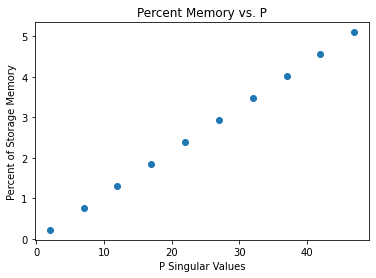

In [140]:
plt.scatter(plist, percentlist)
plt.xlabel('P Singular Values')
plt.ylabel('Percent of Storage Memory')
plt.title('Percent Memory vs. P')
plt.show()

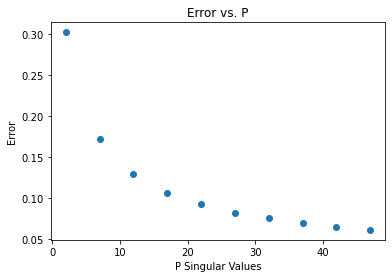

In [141]:
plt.scatter(plist, errorlist)
plt.xlabel('P Singular Values')
plt.ylabel('Error')
plt.title('Error vs. P')
plt.show()